In [1]:
# Getting the Dataset
!wget https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0

--2021-04-05 17:18:51--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2021-04-05 17:18:52--  https://www.dropbox.com/s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf0028d44f6d92a853c4fc50a9b.dl.dropboxusercontent.com/cd/0/inline/BMCpS3pB7ML0pduEeZsDQNH4YNccWVQUPwV3oiZE9FgUjyrB6AnJun0L3pICN5AraPDX3f-2Zms76z-HmTGHPT3CbZgHAgXk7Cd3ZYA6968yz0ORiD2uMMITdKE9PRocQ3lAlJRrphxMXFfW5ZhpLQR7/file# [following]
--2021-04-05 17:18:52--  https://ucf0028d44f6d92a853c4fc50a9b.dl.dropboxusercontent.com/cd/0/inline/BMCpS3pB7M

In [2]:
!unzip CovidDataset-20200427T133042Z-001.zip?dl=0

Archive:  CovidDataset-20200427T133042Z-001.zip?dl=0
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/

In [3]:
train_path = 'CovidDataset/Train'
val_path = 'CovidDataset/Val'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing import image

In [23]:
model = Sequential()

# stacking one convolutional layer one over another increases receptive field, non-linearity in network which helps represent more complex functions 
# and also reduces no of trainable parameters so that model does not overfit

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 54, 54, 64)       

In [26]:
# Data augmentation
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [28]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [29]:
val_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [30]:
val_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [31]:
# Fitting the model
hist = model.fit(train_generator, epochs=10, steps_per_epoch=7, validation_data=val_generator, validation_steps=2)

Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 0.8360 - accuracy: 0.4672 - val_loss: 0.6866 - val_accuracy: 0.5167
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.6488 - accuracy: 0.6413 - val_loss: 0.5690 - val_accuracy: 0.7833
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.4838 - accuracy: 0.7784 - val_loss: 0.3960 - val_accuracy: 0.9500
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.3374 - accuracy: 0.8859 - val_loss: 0.2319 - val_accuracy: 0.9167
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.1760 - accuracy: 0.9345 - val_loss: 0.1279 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.2050 - accuracy: 0.9387 - val_loss: 0.0935 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.2029 - accuracy: 0.9367 - val_loss: 0.1351 - val_accuracy: 0.9333
Epoch 8/10
7/7 [========================

In [32]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [15]:
# Visualizing the results
import matplotlib.pyplot as plt

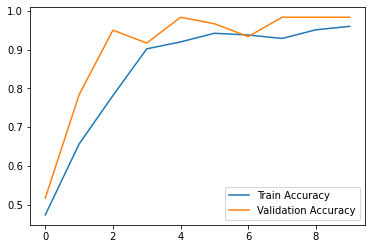

In [33]:
plt.plot(h['accuracy'], label = 'Train Accuracy')
plt.plot(h['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

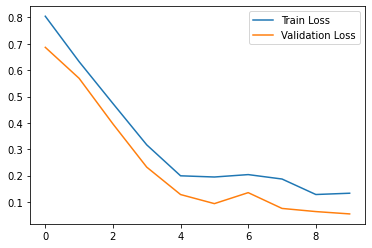

In [34]:
plt.plot(h['loss'], label = 'Train Loss')
plt.plot(h['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

In [35]:
# Evaluating the model
eval = model.evaluate(train_generator)
print('Train Accuracy:', eval[1])

7/7 [==============================] - 7s 954ms/step - loss: 0.0878 - accuracy: 0.9688
Train Accuracy: 0.96875


In [36]:
eval = model.evaluate(val_generator)
print('Test Accuracy:', eval[1])

2/2 [==============================] - 2s 722ms/step - loss: 0.0544 - accuracy: 0.9833
Test Accuracy: 0.9833333492279053


In [37]:
# Saving the model
model.save("covidDetect_model.h5")

In [42]:
from keras.models import load_model
model = load_model('covidDetect_model.h5')

In [44]:
import os

In [57]:
y_actual = []
y_test = []

for i in os.listdir("CovidDataset/Val/Normal/"):
  img = image.load_img("CovidDataset/Val/Normal/"+i , target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.array([img])
  pred = (model.predict(img) > 0.5).astype(np.int)
  y_test.append(pred[0, 0])
  y_actual.append(1)

for j in os.listdir("CovidDataset/Val/Covid/"):
  img = image.load_img("CovidDataset/Val/Covid/"+j , target_size=(224, 224))
  img = image.img_to_array(img)
  img = np.array([img])
  pred = (model.predict(img) > 0.5).astype(np.int)
  y_test.append(pred[0, 0])
  y_actual.append(0)

y_actual = np.array(y_actual)
y_test = np.array(y_test)

print(y_actual.shape , y_test.shape)

(60,) (60,)


In [58]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual , y_test)

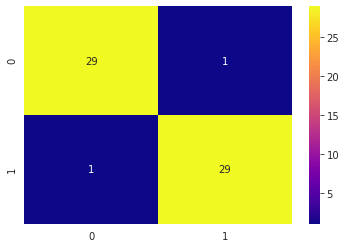

In [65]:
import seaborn as sns

sns.heatmap(cm, cmap='plasma', annot = True)
plt.show()